# Model Selection
Preliminary model assessment showed performance of classification algorithms performing better than regression.   Thus, for the purposes of this notebook, only classification algorithms are explored.

In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

import pickle
import joblib

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from yellowbrick.classifier import ClassificationReport

In [4]:
with open('../Pickle/y_Rate.pickle', 'rb') as f:
    y_Rate = pickle.load(f)
    
with open('../Pickle/y_Cat.pickle', 'rb') as f:
    y_Cat = pickle.load(f)

with open('../Pickle/X_ML.pickle', 'rb') as f:
    X = pickle.load(f)
    
with open('../Pickle/X_ML_scaled.pickle', 'rb') as f:
    Xs = pickle.load(f)

In [5]:
Xs.head()

,BLOCKGROUP_FREQ,TEMPERATURE,TOD_Afternoon,TOD_Early Morning,TOD_Evening,TOD_Late Night,TOD_Mid Afternoon,TOD_Midnight,TOD_Morning,TOD_Night,UV_INDEX
0,-0.845841,-0.885197,-0.427920,4.266101,-0.461227,-0.245897,-0.446427,-0.356565,-0.377655,-0.431413,-0.698027
1,-0.845841,-0.154738,-0.427920,-0.234406,-0.461227,-0.245897,-0.446427,-0.356565,-0.377655,2.317962,-0.698027
2,-0.845841,-1.553125,-0.427920,-0.234406,2.168131,-0.245897,-0.446427,-0.356565,-0.377655,-0.431413,-0.698027
3,-0.845841,-0.918167,2.336888,-0.234406,-0.461227,-0.245897,-0.446427,-0.356565,-0.377655,-0.431413,1.028273
4,-0.845841,-0.667480,-0.427920,-0.234406,-0.461227,-0.245897,2.240006,-0.356565,-0.377655,-0.431413,-0.266452


In [16]:
# Small sample to make sure the models work
X_train, X_test, y_train, y_test = train_test_split(Xs, y_Cat, test_size=30000, train_size=30000)

### Comparing various classification models

In [17]:
# Adapted from 506 Lab:
def score_model(Xtr, Xte, ytr, yte, estimator):
    """
    Test various estimators.
    """ 
    
    model = estimator
    
    # Instantiate the classification model and visualizer
    model.fit(Xtr, ytr)  
    
    expected  = yte
    predicted = model.predict(Xte)
    
    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted, average = 'micro')))
    print('Accuracy score = %0.3f' % accuracy_score(expected, predicted))
    print(confusion_matrix(expected, predicted))

In [18]:
# You get a model!  And you get a model!  Everyone gets a model!

models = [
    KNeighborsClassifier(), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100), ExtraTreesClassifier(),
    DecisionTreeClassifier()
]

for model in models:
    score_model(X_train, X_test, y_train, y_test, model)

KNeighborsClassifier: 0.3928
Accuracy score = 0.393
[[2466 2219  590  386]
 [2230 6352 2006  770]
 [ 915 3576 1946  855]
 [ 900 2397 1372 1020]]
BaggingClassifier: 0.7108666666666668
Accuracy score = 0.711
[[4531  848  177  105]
 [ 914 8776 1229  439]
 [ 311 1605 4366 1010]
 [ 115  622 1299 3653]]
ExtraTreesClassifier: 0.5481666666666667
Accuracy score = 0.548
[[3475 1404  518  264]
 [1083 7346 1956  973]
 [ 454 2531 3127 1180]
 [ 306 1448 1438 2497]]
RandomForestClassifier: 0.5743
Accuracy score = 0.574
[[3672 1270  487  232]
 [1045 7610 1879  824]
 [ 448 2450 3250 1144]
 [ 243 1342 1407 2697]]
ExtraTreesClassifier: 0.5291666666666667
Accuracy score = 0.529
[[3532 1414  479  236]
 [1357 7110 1921  970]
 [ 557 2630 2964 1141]
 [ 415 1551 1454 2269]]
DecisionTreeClassifier: 0.6866666666666666
Accuracy score = 0.687
[[4253 1024  260  124]
 [ 874 8281 1545  658]
 [ 289 1487 4305 1211]
 [ 107  588 1233 3761]]


### Visualize precision, recall, and f1 scores

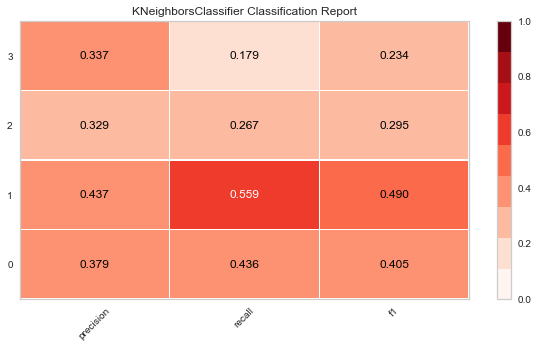

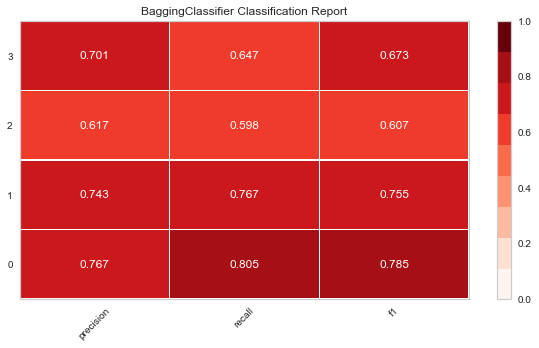

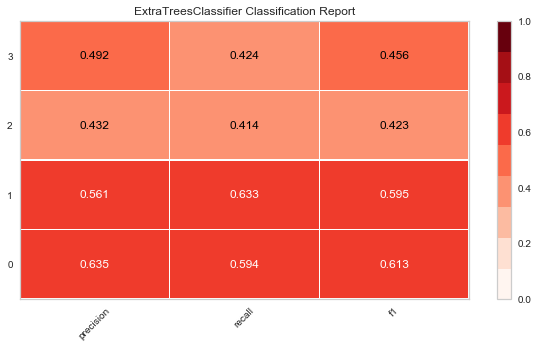

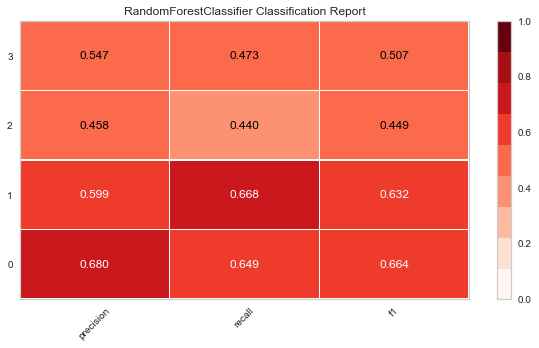

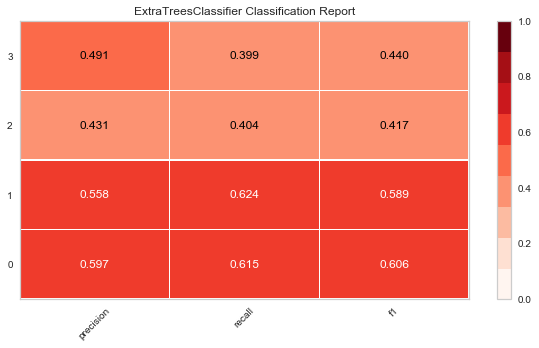

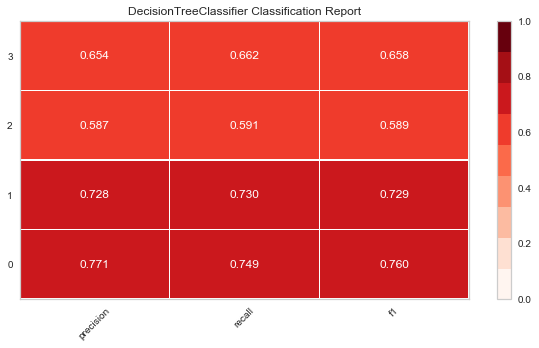

In [22]:
# Adapted from 506 lab
def visualize_model(Xtr, Xte, ytr, yte, estimator):
    """
    Test various estimators.
    """ 
    #y = LabelEncoder().fit_transform(y)
    #model = Pipeline([
    #     ('one_hot_encoder', OneHotEncoder()), 
    #     ('estimator', estimator)
    #])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=[0, 1, 2, 3], 
        cmap="Reds", size=(600, 360)
    )
    visualizer.fit(Xtr, ytr)  
    visualizer.score(Xte, yte)
    visualizer.poof()  

for model in models:
    visualize_model(X_train, X_test, y_train, y_test, model)

In [24]:
model = BaggingClassifier()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print('Bagging Classifier')
print('Accuracy score = %0.3f' % accuracy_score(expected, predicted))
confusion_matrix(expected, predicted)

Bagging Classifier
Accuracy score = 0.712


array([[4579,  817,  167,   98],
       [ 943, 8685, 1271,  459],
       [ 318, 1568, 4421,  985],
       [ 129,  612, 1272, 3676]])

In [28]:
filename = '../JobLib/BaggingClassifier.sav'
joblib.dump(model, filename)

['../JobLib/BaggingClassifier.sav']

In [29]:
filename = '../JobLib/BaggingClassifier.sav'
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.7120333333333333


In [31]:
result = model.predict(X.iloc[[455]])
result[0]

1.0